# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Taipei, Taipei City, Taiwan**, or **Taiwan** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Taipei, Taipei City, Taiwan** to Ann Arbor, USA. In that case at least one source file must be about **Taipei, Taipei City, Taiwan**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Taipei, Taipei City, Taiwan** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Project

The trend of foreign resident and becoming national

## Question

Are foreign resident more and more? Can it affect our number of acquirement nationality being increasing?

## Data source

Region: Taiwan, 
Domain category: Numbers of 'acquirement of the R.O.C. Nationality by Causes and  Home Country' and 'Foreign Residents', by year(2010-2019)

#### foreigner resident data from 1996 to 2018 (外僑居留人數按國籍、職業分)
my github source: https://raw.githubusercontent.com/WeiH0958425316/Applied-Plotting-Charting-Data-Representation-in-Py...
original source from government: https://www.moi.gov.tw/files/site_stuff/321/2/year/year.html

#### Acquirement of the R.O.C. Nationality by Causes and  Home Country (國籍之規化取得人數:)
my github source: https://raw.githubusercontent.com/WeiH0958425316/Applied-Plotting-Charting-Data-Representation-in-Py...
original source from government: https://www.moi.gov.tw/files/site_stuff/321/2/year/year.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
years_list = range(2019, 2009, -1)
country_name_ch = {'the Philippines':'Philippines', 'U.S.A.':'America'}

In [3]:
#### foreigner resident data from 1996 to 2018
# : input and tidy
resident_data = 'https://raw.githubusercontent.com/WeiH0958425316/Applied-Plotting-Charting-Data-Representation-in-Python/master/data/%E5%A4%96%E5%83%91%E5%B1%85%E7%95%99%E4%BA%BA%E6%95%B8%E6%8C%89%E5%9C%8B%E7%B1%8D%E3%80%81%E8%81%B7%E6%A5%AD%E5%88%86/%E5%A4%96%E5%83%91%E5%B1%85%E7%95%99%E4%BA%BA%E6%95%B8%E6%8C%89%E5%9C%8B%E7%B1%8D%E3%80%81%E8%81%B7%E6%A5%AD%E5%88%86.xls' 
resident_data = pd.read_excel(resident_data, sheet_name='歷年Yearly', skiprows=4, skip_footer=8)
resident_data = resident_data.drop('Others', axis=1)
resident_data = resident_data.rename(columns={'Unnamed: 0':'Year'})
resident_data['Year'] = resident_data['Year'].str.extract('([0-9]{4})', expand=False)
resident_data = pd.melt(resident_data, id_vars=["Year", "Grand Total"], var_name='Country', value_name='Resident in Taiwan')

# : change country name
resident_data = resident_data.replace({'Country': country_name_ch}, regex=True)

# : as type to int
resident_data['Year'] = resident_data['Year'].astype(str).str.replace(',', '').astype(int)
resident_data['Resident in Taiwan'] = resident_data['Resident in Taiwan'].astype(str).str.replace(',', '').astype(int)
resident_data['Grand Total'] = resident_data['Grand Total'].astype(str).str.replace(',', '').astype(int)

# : Top 5 country in 2018
max_country = resident_data[resident_data['Year']==resident_data['Year'].max()]
max_country = max_country.sort_values('Resident in Taiwan', ascending=False)[:5]
resident_data = resident_data[resident_data['Country'].isin(max_country['Country'])]
resident_data = resident_data.drop('Grand Total', axis=1)

# : keep year in 2000~2019
resident_data = resident_data[resident_data['Year'].isin(years_list)]


resident_data.head()

,Year,Country,Resident in Taiwan
290,2010,Malaysia,9396
291,2011,Malaysia,11196
292,2012,Malaysia,12151
293,2013,Malaysia,13785
294,2014,Malaysia,16610


In [4]:
# Acquirement of the R.O.C. Nationality by Causes and  Home Country
national_url = 'https://raw.githubusercontent.com/WeiH0958425316/Applied-Plotting-Charting-Data-Representation-in-Python/master/data/%E5%9C%8B%E7%B1%8D%E4%B9%8B%E8%A6%8F%E5%8C%96%E5%8F%96%E5%BE%97%E4%BA%BA%E6%95%B8/%E5%9C%8B%E7%B1%8D%E4%B9%8B%E8%A6%8F%E5%8C%96%E5%8F%96%E5%BE%97%E4%BA%BA%E6%95%B8.xls'
national_data = []
for year in years_list:
    temp_data = pd.read_excel(national_url, sheetname=str(year), skiprows=4, skip_footer=5)
    temp_data = temp_data[['Unnamed: 1', 'Grand Total']]
    temp_data = temp_data.rename(columns={'Unnamed: 1':'Country', 'Grand Total':'Acquirement Nationality'})
    temp_data = temp_data.dropna(thresh=2)
    temp_data['Year'] = year
    temp_data = temp_data.replace({'Country': country_name_ch}, regex=True)
    temp_data = temp_data[temp_data['Country'].isin(max_country['Country'])]
    national_data.append(temp_data)
national_data = pd.concat(national_data)
national_data.head()

,Country,Acquirement Nationality,Year
5,Malaysia,69,2019
6,Indonesia,350,2019
7,Thailand,72,2019
8,Vietnam,2325,2019
11,Philippines,362,2019


In [5]:
resident_n_national = pd.merge(national_data, resident_data, left_on=['Country', 'Year'], right_on=['Country', 'Year'])
resident_n_national['National of proportion'] = resident_n_national['Acquirement Nationality']/resident_n_national['Resident in Taiwan']
resident_n_national['National of proportion'] = resident_n_national['National of proportion'].astype(float)

resident_n_national = pd.melt(resident_n_national, id_vars=['Year', 'Country'], var_name='Var', value_name='Value')
resident_n_national['Value'] = resident_n_national['Value'].astype(float)
resident_n_national_country = resident_n_national.pivot_table(values='Value', index=['Year', 'Var'], columns='Country', aggfunc=np.mean)


resident_n_national_country = resident_n_national_country.reset_index()
resident_n_national_country = resident_n_national_country.set_index('Year')
resident_n_national_country.head()

resident_n_national_var = resident_n_national.pivot_table(values='Value', index=['Year', 'Country'], columns='Var', aggfunc=np.mean)
resident_n_national_var = resident_n_national_var.reset_index()
resident_n_national_var = resident_n_national_var.set_index('Year')
resident_n_national_var.head()

Var,Country,Acquirement Nationality,National of proportion,Resident in Taiwan
Year,,,,
2010,Indonesia,913.0,0.006312,144651.0
2010,Malaysia,24.0,0.002554,9396.0
2010,Philippines,280.0,0.003865,72453.0
2010,Thailand,72.0,0.001069,67326.0
2010,Vietnam,5887.0,0.068276,86224.0


<IPython.core.display.Javascript object>


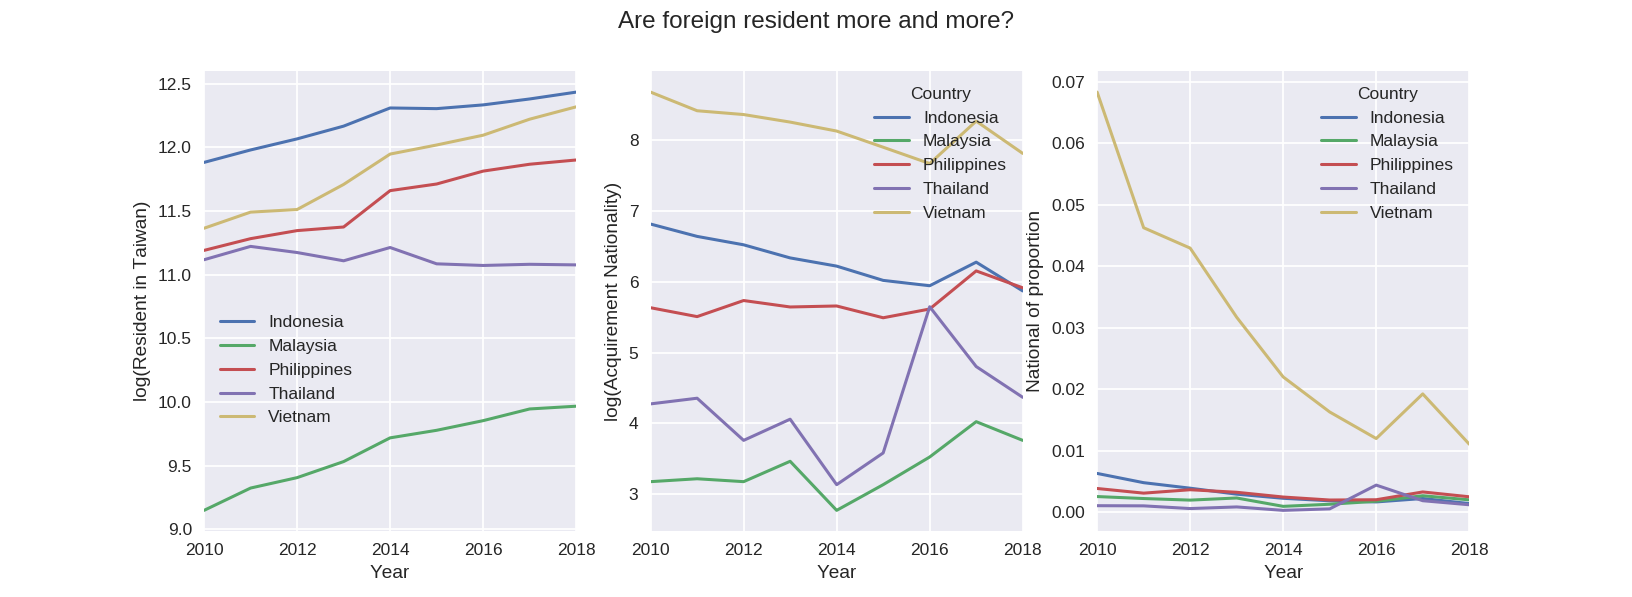

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3)
plt.suptitle('Are foreign resident more and more?', fontsize=14)


In [7]:
plt_data = resident_n_national_country[resident_n_national_country['Var']=='Resident in Taiwan'].drop('Var', axis=1)
plt_data = np.log(plt_data)
ax = plt_data.plot.line(ax=axes[0])
# ax.get_legend().remove()
# plt.title('Resident in Taiwan')
# plt.ylabel('log(Resident in Taiwan)')
ax.legend(loc=6, bbox_to_anchor=(0.0, 0.0, 0.1, 0.7))
axes[0].set_title('')
axes[0].set_ylabel('log(Resident in Taiwan)')

In [8]:
plt_data = resident_n_national_country[resident_n_national_country['Var']=='Acquirement Nationality'].drop('Var', axis=1)
plt_data = np.log(plt_data)
plt_data.plot.line(ax=axes[1])
# plt.title('Acquirement Nationality')
# plt.ylabel('log(Acquirement Nationality)')
axes[1].set_title('')
axes[1].set_ylabel('log(Acquirement Nationality)')

In [9]:
plt_data = resident_n_national_country[resident_n_national_country['Var']=='National of proportion'].drop('Var', axis=1)
# plt_data = plt_data.drop('Vietnam', axis=1)
plt_data.plot.line(ax=axes[2])
# plt.title('National of proportion (exclude \'Vietnam\, it\'s too high )')
# plt.ylabel('National of proportion')

axes[2].set_title('')
axes[2].set_ylabel('National of proportion')

In [ ]:
# plt_data = resident_n_national_var
# # ax = sns.pairplot(x_vars=['Acquirement Nationality'], y_vars=['Resident in Taiwan'], data=plt_data, hue="Country", size=5)
# # plt.title('Each point means one year of each country')
# # # ax.ylabel('Resident in Taiwan')
# # ax.set(ylabel='Resident in Taiwan')

# plt_data = plt_data.groupby('Country')
# for name, group in plt_data:
#     group.plot.scatter('Acquirement Nationality', 'Resident in Taiwan', c=name)

# Summary

The first plot, we can know the number of foreign residents in Taiwan(I call it resident) is more and more, be careful, they is log(resident), so the growth is very high( for example, Malaysia's growth of average is 10%)
And the second plot, we can find a problem. Why the number of acquirement nationality(I call it nationality) is not increasing stable?.
In the last plot, we can find Vietnam's trend is decreasing fast, other country have the same trend. (rate less than Vietnam)
Maybe the reason is more people work in Taiwan, but just work, they don't want to apply to get nationality.
or maybe the government adjust the application threshold, or maybe have more reasons.

But, we know the number of acquirement of nationality not only related with number of foreign residents

Describe your design choices for your visual in regards to Cairo's principle of truthfulness.
I use the data from the government to make sure it's true, and consider some countries and some years are not complete, so I only choose top 5 countries and from 2010 to 2019.

Describe your design choices for your visual in regards to Cairo's principle of beauty.
In the default, the legend of the 1st plot covered the green line(loc is bottom center), so I adjust position through two parameters, lo and bbox_to_anchor.
I also remove the titles of each plot. I only set one title of the whole subplot. It's more clear.


Describe your design choices for your visual in regards to Cairo's principle of functionality.
In the beginning, I only plot the first and second char(resident and nationality). Sometime we want to check foreigner's willing(proportion), I add more chart.


Describe your design choices for your visual in regards to Cairo's principle of insightfulness.
I use a line plot to find the trend, and we can find insight, Taiwan is more and more attractive to attract foreigner to work. If we want more foreigner become Taiwanese, we neet to adjust application threshold or give more attractive policy or become better.